In [2]:
import tensorflow as tf

model = tf.keras.models.load_model("tf_model.keras")

In [3]:
train_dataset_path = 'melanoma_cancer_dataset/train'
test_dataset_path = 'melanoma_cancer_dataset/test'

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dataset_path, image_size=(224, 224), batch_size=32,
    label_mode='int', )

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_dataset_path, image_size=(224, 224), batch_size=32,
    label_mode='int', )

Found 9605 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 268ms/step - accuracy: 0.9049 - loss: 0.4026
Test accuracy: 0.8949999809265137
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step
True labels:  [1 1 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0 1 1 0 1 1 0 0 0 1 1 0 1 1 0 0]
Predicted labels:  [1 0 0 1 1 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 1 1 0 0 0 1 1 0 1 1 0 0]


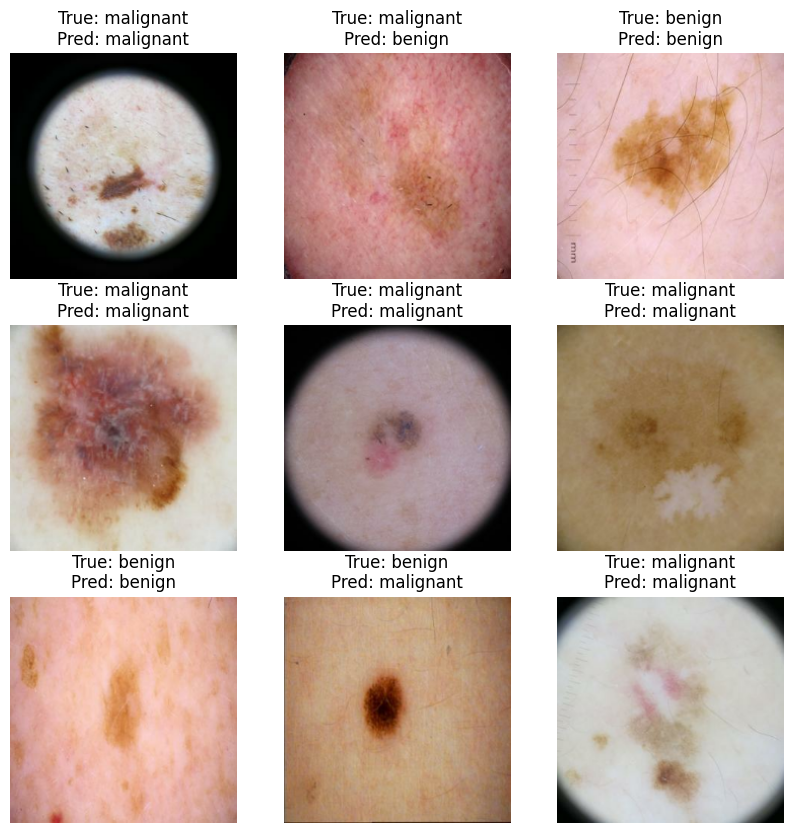

2024-05-17 00:59:59.114701: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [5]:
import numpy as np
import matplotlib.pyplot as plt

test_loss, test_accuracy = model.evaluate(test_dataset)
print(f'Test accuracy: {test_accuracy}')

class_names = test_dataset.class_names

# Make predictions on a batch of test images
for images, labels in test_dataset.take(1):
    predictions = model.predict(images)
    predicted_labels = np.argmax(predictions, axis=1)

    # Print the true and predicted labels
    print("True labels: ", labels.numpy())
    print("Predicted labels: ", predicted_labels)

    # Display the first 9 images and their predicted labels
    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"True: {class_names[labels[i]]}\nPred: {class_names[predicted_labels[i]]}")
        plt.axis("off")
    plt.show()